In [3]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
%matplotlib inline 
# add this or not show plot

pylab.rcParams['figure.figsize'] = (8.0, 10.0)
dataDir='D:\Projects\learnpy\senet\dataset'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

# initialize COCO api for instance annotations
coco=COCO(annFile)

cats = coco.loadCats(coco.getCatIds())
cat_dict = {}
for cat in cats:
    cat_dict[cat['id']] = cat['name']

annIds = coco.getAnnIds()
annIds_num = len(annIds) # 36781

loadedann = []
for id_i in range(annIds_num):
    loadedann.append(coco.loadAnns(annIds[id_i]))

img_dict = {} # image id: image category
img_id_list = []
for ann_i in loadedann:
    ann_i = ann_i[0]
    img_id = ann_i['image_id']
    img_id_list.append(img_id)
    cat_id = ann_i['category_id']
    cat_name = cat_dict[cat_id]
    if img_id not in img_dict.keys():
        img_dict[img_id] = sorted([cat_name])
    else:
        if cat_name not in img_dict[img_id]:
            new_catdict = img_dict[img_id]
            new_catdict.append(cat_name)
            img_dict[img_id] = sorted(new_catdict)

print(img_dict) # like：{289343: ['dog', 'person', 'bench', 'bicycle'], 61471: ['dog', 'bottle', 'toilet'], ...
print(len(img_dict))
# print(img_id_list.index(198915)) # image id of 198915 is not labeled

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!
{289343: ['bench', 'bicycle', 'dog', 'person'], 61471: ['bottle', 'dog', 'toilet'], 472375: ['cup', 'dog', 'motorcycle'], 520301: ['dog'], 579321: ['dog', 'person'], 494869: ['bottle', 'bowl', 'dog', 'person', 'spoon'], 554002: ['chair', 'dog', 'handbag', 'person'], 78823: ['car', 'dog', 'potted plant'], 419974: ['bench', 'bottle', 'chair', 'cup', 'dining table', 'dog', 'fork', 'knife', 'oven', 'person', 'potted plant', 'wine glass'], 404484: ['dog', 'person', 'potted plant', 'teddy bear', 'tv'], 329219: ['cup', 'dog', 'fork', 'knife', 'person', 'sink', 'spoon'], 68078: ['bottle', 'dog', 'sink', 'toilet'], 170893: ['dog', 'toilet'], 65485: ['car', 'dog'], 498286: ['car', 'dog', 'truck'], 424162: ['backpack', 'bicycle', 'car', 'dog', 'person', 'truck'], 61108: ['bench', 'bicycle', 'car', 'dog'], 67213: ['car', 'dog', 'person'], 365207: ['bench', 'car', 'dog'], 131273: ['dog'], 279278: ['bicycle', 'cup', '

ValueError: 198915 is not in list

In [5]:
file_list = os.listdir('D:\Projects\learnpy\senet\dataset\\val2017')
file_list = [int(i.rstrip('.jpg').lstrip('0')) for i in file_list]
print(file_list)

[139, 285, 632, 724, 776, 785, 802, 872, 885, 1000, 1268, 1296, 1353, 1425, 1490, 1503, 1532, 1584, 1675, 1761, 1818, 1993, 2006, 2149, 2153, 2157, 2261, 2299, 2431, 2473, 2532, 2587, 2592, 2685, 2923, 3156, 3255, 3501, 3553, 3661, 3845, 3934, 4134, 4395, 4495, 4765, 4795, 5001, 5037, 5060, 5193, 5477, 5503, 5529, 5586, 5600, 5992, 6012, 6040, 6213, 6460, 6471, 6614, 6723, 6763, 6771, 6818, 6894, 6954, 7088, 7108, 7278, 7281, 7386, 7511, 7574, 7784, 7795, 7816, 7818, 7888, 7977, 7991, 8021, 8211, 8277, 8532, 8629, 8690, 8762, 8844, 8899, 9378, 9400, 9448, 9483, 9590, 9769, 9772, 9891, 9914, 10092, 10363, 10583, 10707, 10764, 10977, 10995, 11051, 11122, 11149, 11197, 11511, 11615, 11699, 11760, 11813, 12062, 12120, 12280, 12576, 12639, 12667, 12670, 12748, 13004, 13177, 13201, 13291, 13348, 13546, 13597, 13659, 13729, 13774, 13923, 14007, 14038, 14226, 14380, 14439, 14473, 14831, 14888, 15079, 15254, 15272, 15278, 15335, 15338, 15440, 15497, 15517, 15597, 15660, 15746, 15751, 15956, 160

In [6]:
img_ids = []
for k in img_dict.keys():
    img_ids.append(k)
diff_img_ids = set(file_list).difference(set(img_ids))
print(diff_img_ids)
print(len(diff_img_ids)) # 48 images with no label

{198915, 42888, 58636, 382734, 41488, 536343, 550939, 101022, 127135, 344611, 228771, 261796, 458790, 308391, 267946, 447789, 402096, 260657, 270386, 370999, 330554, 176701, 477118, 226111, 64574, 98497, 320706, 404601, 121153, 268996, 49091, 374727, 476491, 528977, 556498, 200152, 461275, 310622, 240767, 312549, 514540, 560371, 278006, 542073, 481404, 25593, 502910, 173183}
48


In [7]:
img_no_ann = list(diff_img_ids)
for img in img_no_ann:
    img_dict[img] = ['Unknown'] # set the category of unlabeled image to 'unknown'
print(img_dict)

{289343: ['bench', 'bicycle', 'dog', 'person'], 61471: ['bottle', 'dog', 'toilet'], 472375: ['cup', 'dog', 'motorcycle'], 520301: ['dog'], 579321: ['dog', 'person'], 494869: ['bottle', 'bowl', 'dog', 'person', 'spoon'], 554002: ['chair', 'dog', 'handbag', 'person'], 78823: ['car', 'dog', 'potted plant'], 419974: ['bench', 'bottle', 'chair', 'cup', 'dining table', 'dog', 'fork', 'knife', 'oven', 'person', 'potted plant', 'wine glass'], 404484: ['dog', 'person', 'potted plant', 'teddy bear', 'tv'], 329219: ['cup', 'dog', 'fork', 'knife', 'person', 'sink', 'spoon'], 68078: ['bottle', 'dog', 'sink', 'toilet'], 170893: ['dog', 'toilet'], 65485: ['car', 'dog'], 498286: ['car', 'dog', 'truck'], 424162: ['backpack', 'bicycle', 'car', 'dog', 'person', 'truck'], 61108: ['bench', 'bicycle', 'car', 'dog'], 67213: ['car', 'dog', 'person'], 365207: ['bench', 'car', 'dog'], 131273: ['dog'], 279278: ['bicycle', 'cup', 'dog', 'handbag', 'person', 'skateboard'], 482100: ['potted plant', 'toilet'], 54050

In [8]:
# generate .csv data file
import pandas as pd
img_csv_list = []
for k,v in img_dict.items():
    csv_list_i = {}
    csv_list_i['image_id'] = 'train_' + '%012d' % k
    csv_list_i['labels'] = str(v).replace('\'', '').strip('[,]').replace(', ', ' ')
    img_csv_list.append(csv_list_i)

df = pd.DataFrame(img_csv_list, columns=['image_id','labels'])
df.to_csv('image_labels.csv', index=False)

In [9]:
df = pd.read_csv('image_labels.csv')
df.head()

,image_id,labels
0,train_000000289343,bench bicycle dog person
1,train_000000061471,bottle dog toilet
2,train_000000472375,cup dog motorcycle
3,train_000000520301,dog
4,train_000000579321,dog person


In [10]:
# rename the image files to match the .csv file
filePath = 'D:\Projects\learnpy\senet\dataset\\val2017'
fileList=os.listdir(filePath)

n=0
for i in fileList:
    oldname=filePath+ os.sep + fileList[n] 
    ending = os.path.split(oldname)[-1]
    newname=filePath+os.sep +'train_'+ ending
    os.rename(oldname,newname)  
    print(oldname,'======>',newname)
    n+=1

D:\Projects\learnpy\senet\dataset\val2017\000000000139.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000139.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000285.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000285.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000632.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000632.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000724.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000724.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000776.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000776.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000785.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000785.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000802.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000000802.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000000872.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000018575.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000018575.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000018737.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000018737.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000018770.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000018770.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000018833.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000018833.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000018837.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000018837.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000019042.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000019042.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000019109.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000019109.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000019221.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000040757.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000040757.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000041488.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000041488.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000041633.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000041633.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000041635.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000041635.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000041872.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000041872.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000041888.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000041888.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000041990.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000041990.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000042070.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000064359.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064359.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064462.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064462.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064495.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064495.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064499.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064499.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064523.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064523.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064574.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064574.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064718.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000064718.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000064868.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000088040.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088040.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088218.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088218.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088250.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088250.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088265.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088265.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088269.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088269.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088345.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088345.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088432.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000088432.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000088462.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000110721.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000110721.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000110784.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000110784.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000110884.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000110884.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000110972.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000110972.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000110999.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000110999.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000111036.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000111036.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000111086.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000111086.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000111179.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000133233.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133233.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133244.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133244.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133343.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133343.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133418.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133418.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133567.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133567.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133631.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133631.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133645.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000133645.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000133778.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000154718.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000154718.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000154947.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000154947.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000155051.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000155051.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000155145.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000155145.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000155154.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000155154.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000155179.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000155179.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000155291.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000155291.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000155341.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000173044.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173044.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173057.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173057.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173091.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173091.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173183.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173183.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173302.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173302.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173371.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173371.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173383.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000173383.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000173799.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000191845.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000191845.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192047.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000192047.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192191.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000192191.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192607.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000192607.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192670.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000192670.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192699.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000192699.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192716.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000192716.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000192871.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000214539.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000214539.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000214703.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000214703.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000214720.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000214720.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000214753.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000214753.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000214869.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000214869.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000215072.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000215072.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000215114.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000215114.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000215245.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000235057.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235057.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235064.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235064.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235241.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235241.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235252.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235252.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235399.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235399.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235778.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235778.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235784.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000235784.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000235836.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000259597.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000259597.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000259625.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000259625.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000259640.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000259640.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000259690.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000259690.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000259830.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000259830.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000259854.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000259854.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000260105.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000260105.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000260106.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000282046.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000282046.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000282296.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000282296.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000282298.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000282298.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000282912.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000282912.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000283037.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000283037.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000283038.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000283038.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000283070.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000283070.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000283113.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000303499.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303499.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303566.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303566.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303653.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303653.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303713.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303713.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303818.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303818.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303863.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303863.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303893.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000303893.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000303908.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000325031.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325031.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325114.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325114.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325306.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325306.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325347.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325347.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325483.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325483.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325527.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325527.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325838.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000325838.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000325991.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000346968.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000346968.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347163.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000347163.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347174.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000347174.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347254.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000347254.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347265.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000347265.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347335.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000347335.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347370.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000347370.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000347456.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000368752.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000368752.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000368900.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000368900.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000368940.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000368940.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000368961.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000368961.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000368982.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000368982.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000369037.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000369037.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000369081.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000369081.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000369310.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000390555.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000390555.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000390826.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000390826.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000390902.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000390902.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000391140.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000391140.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000391144.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000391144.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000391290.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000391290.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000391375.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000391375.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000391648.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000413395.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000413395.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000413404.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000413404.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000413552.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000413552.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000413689.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000413689.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000414034.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000414034.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000414133.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000414133.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000414170.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000414170.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000414261.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000436315.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000436315.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000436551.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000436551.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000436617.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000436617.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000436738.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000436738.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000436883.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000436883.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000437110.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000437110.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000437205.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000437205.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000437239.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000456865.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000456865.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000457078.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000457078.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000457262.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000457262.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000457559.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000457559.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000457848.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000457848.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000457884.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000457884.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000458045.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000458045.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000458054.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000475779.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000475779.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000475904.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000475904.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000476119.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000476119.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000476215.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000476215.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000476258.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000476258.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000476415.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000476415.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000476491.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000476491.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000476514.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000493442.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493442.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000493566.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493566.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000493613.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493613.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000493772.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493772.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000493799.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493799.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000493864.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493864.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000493905.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000493905.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000494188.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000516173.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516173.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516316.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516316.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516318.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516318.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516601.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516601.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516677.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516677.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516708.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516708.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516804.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000516804.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000516871.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000540414.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000540414.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000540466.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000540466.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000540502.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000540502.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000540928.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000540928.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000540932.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000540932.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000540962.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000540962.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000541055.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000541055.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000541123.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000563470.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563470.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563603.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563603.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563604.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563604.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563648.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563648.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563653.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563653.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563702.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563702.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563758.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000563758.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000563882.jpg ======> D:\Projec

D:\Projects\learnpy\senet\dataset\val2017\000000581615.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000581615.jpg
D:\Projects\learnpy\senet\dataset\val2017\000000581781.jpg ======> D:\Projects\learnpy\senet\dataset\val2017\train_000000581781.jpg


In [11]:
from fastai.datasets import Config

path = Config.data_path()/'coco'
path.mkdir(parents=True, exist_ok=True)
path

WindowsPath('D:/Users/Lenovo/.fastai/data/coco')

In [12]:
from fastai.vision import *
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [13]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'image_labels.csv', folder='val2017', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [14]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

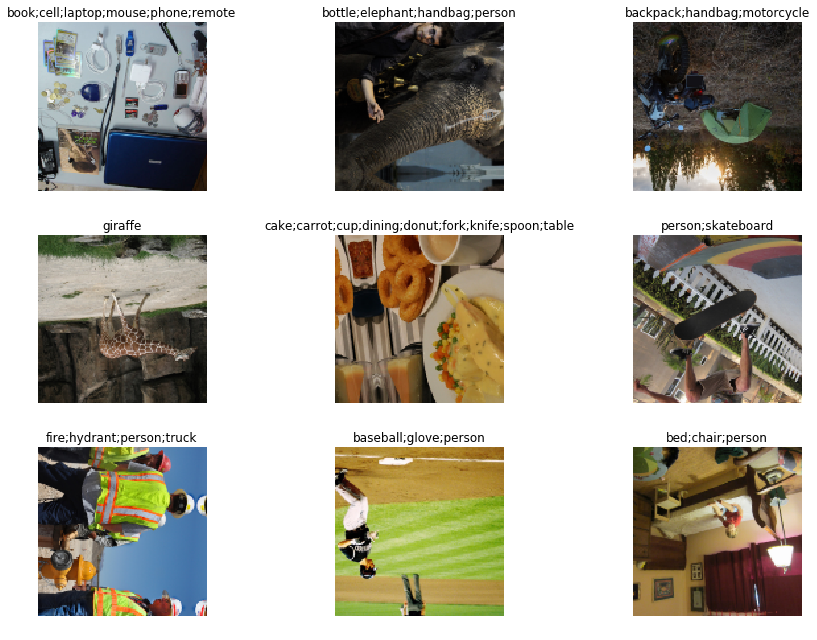

In [15]:
data.show_batch(rows=3, figsize=(12,9))

In [16]:
data

ImageDataBunch;

Train: LabelList (4000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
bench;bicycle;dog;person,bottle;dog;toilet,cup;dog;motorcycle,dog,dog;person
Path: D:\Users\Lenovo\.fastai\data\coco;

Valid: LabelList (1000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: MultiCategoryList
traffic;light;train,apple;cell;phone;person,person;skis,giraffe,motorcycle
Path: D:\Users\Lenovo\.fastai\data\coco;

Test: None

In [19]:
import pretrainedmodels

# use pretrained senet model
def se_resnet50(pretrained=False):
    pretrained = 'imagenet' if pretrained else None
    model = pretrainedmodels.se_resnet50(pretrained=None)
    return model

arch = se_resnet50

In [20]:
acc_02 = partial(accuracy_thresh, thresh=0.2) # accuracy_thresh returns all the thing above threshold
f_score = partial(fbeta, thresh=0.2)

learn = cnn_learner(data, arch, metrics=[acc_02, f_score]) # metrics will not change the results but determine what to show

learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


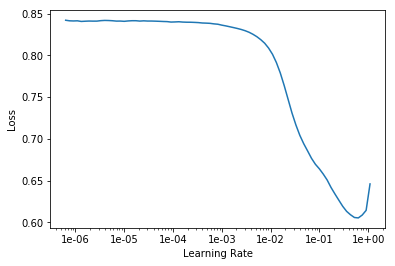

In [80]:
learn.recorder.plot()

In [82]:
lr = 0.01
learn.fit_one_cycle(5, slice(lr)) # slice(start, stop[, step])

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.456928,0.128631,0.964107,0.237390,01:45
1,0.187254,0.094881,0.960441,0.471305,01:38
2,0.124585,0.089716,0.960151,0.514549,01:37
3,0.103051,0.086593,0.964161,0.532494,01:39
4,0.094272,0.085758,0.962484,0.544861,01:37
